In [1]:
import Ativo as at
import FileManager as fman
import pickle
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import Parameters
import Simulator
import StatsGatherer
import OptimizerSimulator
import BootstrapSimulator
import StratsMaestro

pd.set_option('display.max_rows', 167) # opcional, questão de visualização para debugar caso 1

In [2]:
fm = fman.FileManager()

##### Na primeira vez precisa gerar o pickle de ativo_dia_list.pkl
##### Somente executar esse código se o pickle ativo_dia_list.pkl não tiver sido gerado

In [ ]:
# abre arquivo com freefloats
names_pennystocks = fm.getNames()
names_free_float = fm.getFreeFloatNames()
names = list(set(names_pennystocks) & set(names_free_float))
names.sort()

In [ ]:
# gera ativo_dia_list (adl), que é uma lista com resumo dos dias que vai nos auxiliar a filtrar os dias de interesse
# também vai auxiliar na análise de ativos-dia
adl = []
for n in names[0:10]:
#for n in names:
    print(n)
    try:
        a = at.Ativo(n, fm[n])
        for intraday in a.intraDays:
            d = {'name': a.name,
                 'date': intraday.date,
                 'freefloat': fm.getFreeFloat(n),
                 'stats': intraday.stats}
            adl.append( d )
    except IndexError:
        print("Ativo sem nenhum dado ou dado inconsistente")

In [ ]:
with open('AtivoDiaList.pkl', 'wb') as filehandle: # w de write e b de binary
    pickle.dump(adl,filehandle)

##### Com o pickle ativo_dia_list.pkl gerado, prosseguir daqui

In [3]:
with open('AtivoDiaList.pkl', 'rb') as filehandle:
    ativo_dia_list = pickle.load(filehandle)

In [4]:
pars = Parameters.ParametersSimple()

In [5]:
sg = StatsGatherer.StatsGatherer(pars)

In [6]:
sm = StratsMaestro.StratsMaestro(pars)

In [7]:
sim = Simulator.Simulator(fm,ativo_dia_list,pars,sm,sg)

In [8]:
bss = BootstrapSimulator.BootstrapSimulator(sg)

In [9]:
os = OptimizerSimulator.OptimizerSimulator(sim, bss, sg)

In [10]:
# pars.setFilterParameters(gap_threshold=0.1, F_high_threshold=9)
# pars.setFilterParameters(prevol_threshold=15000000)
sim.runFiltering()

In [11]:
# pars.setSimParameters(start_money = 10000,allocation=0.1)
# pars.setAlgoParameters(short_after=0, exit_target=0.4, exit_stop=0.4)
# pars.setAlgoParameters(short_after=0.2)

# sim.runSimulation()

#sim.saveTrades('case1_trades.pkl')
sim.openTrades('case1_trades.pkl')

In [12]:
dfd = sg.filtereddf # DataFrame of filtered ativo-dias
dft = sg.tradesdf # DataFrame of trades
dfes = sg.extrastatsdf # DataFrame of extra statistics

##### Algumas análises da simulação

In [13]:
sg.printSimResults()

prevol_threshold 800000
open_dolar_threshold 2
gap_threshold 0.2
F_low_threshold 0
F_high_threshold 1

short_after 0.1
exit_target 0.3
exit_stop 0.3

start_money 10000
allocation 0.1
locate_fee 0.02
commission 2

Start Money: $10,000.00
End Money: $24,252.02
Number of Trades: 167
Number of filtered ativo-dias: 311
Max Drawdown: 0.12630384002450823


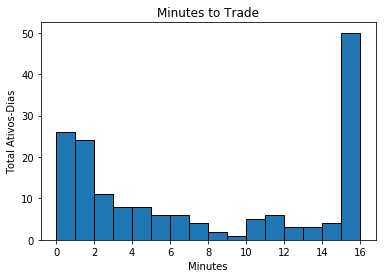

In [14]:
sg.plotHistMinsToTrade()

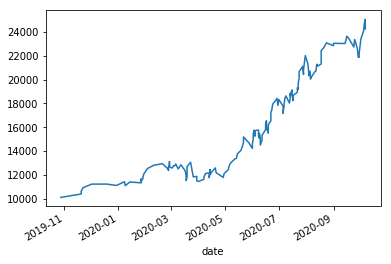

In [15]:
sg.plotEquityCurve()

##### Análise de algumas estratificações

In [16]:
dftr = pd.merge(dft,dfd,how='inner',on=['name','date'])
dftr = dftr[['name','date','gap','factorF','profit','cum_profit']]
dftr

,name,date,gap,factorF,profit,cum_profit
0,XNET,2019-10-28,0.259833,0.272726,0.150676,1.015068
1,ARAV,2019-11-20,1.011958,5.330140,0.300000,1.045520
2,CGIX,2019-11-20,1.755981,2.848012,0.242424,1.070866
3,VIVE,2019-11-22,0.369431,0.245800,0.300000,1.102992
4,ASLN,2019-12-02,0.753927,0.316165,0.300000,1.136081
5,AMRX,2019-12-12,0.343840,0.197234,0.023066,1.138702
6,RAD,2019-12-19,0.316168,0.320711,0.023079,1.141330
7,SVRA,2019-12-30,1.381503,0.568140,-0.081200,1.132062
8,CEI,2020-01-08,0.219632,0.116097,0.300000,1.166024
9,AGTC,2020-01-09,0.594724,0.907599,-0.267259,1.134861


In [17]:
bins = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]
gap = np.clip( dftr['gap'], bins[0], bins[-1] )
dftr.groupby(pd.cut(gap, bins)).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
gap,,,,,,,,
"(0.2, 0.3]",0.656250,0.343750,0.059893,0.167241,-0.145045,32,21.0,11.0
"(0.3, 0.4]",0.833333,0.166667,0.101670,0.182004,-0.300000,12,10.0,2.0
"(0.4, 0.5]",0.578947,0.421053,0.044601,0.223321,-0.201138,19,11.0,8.0
"(0.5, 0.6]",0.750000,0.250000,0.061273,0.179514,-0.293452,20,15.0,5.0
"(0.6, 0.7]",0.750000,0.250000,0.106792,0.226048,-0.250974,16,12.0,4.0
"(0.7, 0.8]",0.571429,0.428571,0.078961,0.247418,-0.145648,7,4.0,3.0
"(0.8, 0.9]",0.800000,0.200000,0.111320,0.214151,-0.300000,10,8.0,2.0
"(0.9, 1.0]",1.000000,0.000000,0.208696,0.208696,NaN,2,2.0,0.0
"(1.0, 1.1]",0.750000,0.250000,0.139446,0.285928,-0.300000,8,6.0,2.0


In [18]:
dftr.groupby(dftr['date'].dt.to_period('M')).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
date,,,,,,,,
2019-10,1.000000,0.000000,0.150676,0.150676,NaN,1,1.0,0.0
2019-11,1.000000,0.000000,0.280808,0.280808,NaN,3,3.0,0.0
2019-12,0.750000,0.250000,0.066236,0.115382,-0.081200,4,3.0,1.0
2020-01,0.700000,0.300000,0.115893,0.226117,-0.141296,10,7.0,3.0
2020-02,0.666667,0.333333,0.069506,0.221576,-0.234632,9,6.0,3.0
2020-03,0.523810,0.476190,-0.022623,0.189020,-0.255429,21,11.0,10.0
2020-04,0.642857,0.357143,0.062767,0.231816,-0.241520,14,9.0,5.0
2020-05,0.909091,0.090909,0.199595,0.249554,-0.300000,11,10.0,1.0
2020-06,0.718750,0.281250,0.084724,0.226720,-0.278153,32,23.0,9.0


##### Analisando o Dataframe com extra statistics

In [19]:
# aqui podemos fazer alguma análise, basta fazer inner join de dfes com os outros dataframes dfd, dft
dfes

,name,date,open_pre,high_pre,low_pre,close_pre,open_core,high_core,low_core,close_core
0,XNET,2019-10-28,4.620000,6.67000,4.620000,6.020000,6.079700,6.830000,5.380000,5.680000
1,ARAV,2019-11-20,7.000000,29.60000,7.000000,13.360000,13.460000,15.620000,9.600000,9.600000
2,CGIX,2019-11-20,2.150000,6.80000,2.150000,5.790000,5.760000,7.790000,4.080000,4.800000
3,VIVE,2019-11-22,2.250000,5.90000,2.250000,3.050000,3.040000,3.500000,0.855500,0.900000
4,ASLN,2019-12-02,4.520000,8.10000,4.520000,6.700000,6.700000,8.180000,5.000000,5.456300
5,AMRX,2019-12-12,3.600000,4.98000,3.600000,4.670000,4.690000,5.350000,4.320000,5.040000
6,RAD,2019-12-19,8.450000,10.99000,8.450000,10.970000,10.990000,12.500000,10.960000,11.810000
7,SVRA,2019-12-30,1.880000,4.30000,1.880000,4.130000,4.120000,5.200000,3.210000,4.900000
8,CEI,2020-01-08,3.550000,3.88000,3.130000,3.750000,3.720000,4.100000,2.860000,3.200000
9,AGTC,2020-01-09,4.410000,7.75000,4.410000,6.650000,6.650000,9.500000,5.900000,9.270000


##### Rodando Bootstrap

In [20]:
bss.runBootstrap()

In [21]:
sg.printBootstrapResults()

Max Drawdown: 0.12630384002450823
Mean of max Drawdown: 0.14705820110941673
Max of max Drawdown: 0.23112697707510121
Min of max Drawdown: 0.08571708857532834


##### Códigos para rodar combinações de parâmetros e otimizar.

In [ ]:
# oficial que gostaríamos de explorar
os.runSimulationGroup(
    prevol_threshold = [800000],
    exit_target=[0.1, 0.2, 0.3, 0.4], 
    exit_stop=[0.1, 0.2, 0.3, 0.4], 
    short_after=[0, 0.1, 0.2, 0.3],
    gap_threshold=[0, 0.1, 0.2],
    F_high_threshold = [1,2,3,4,5]
)

In [ ]:
# an.saveGroupResults('erich01.pkl')
os.openGroupResults('erich01.pkl')

In [22]:
# rodar para debugar
os.runSimulationGroup(
    prevol_threshold = [15000000],
    exit_target=[0.2, 0.3], 
    exit_stop=[0.3], 
    short_after=[0, 0.1],
    gap_threshold=[0.1],
    F_high_threshold = [1]
)

Simulando 4 combinações de parâmetros.
running another simulation. 08/01/2021 20:58:13
running another simulation. 08/01/2021 20:58:24
running another simulation. 08/01/2021 20:58:35
running another simulation. 08/01/2021 20:58:47


In [23]:
sg.groupResults

,prevol_threshold,open_dolar_threshold,gap_threshold,F_low_threshold,F_high_threshold,short_after,exit_target,exit_stop,start_money,allocation,locate_fee,commission,end_money,profit,max_drawdown,meanmax_drawdown,maxmax_drawdown,minmax_drawdown,n_trades,n_filtered_ativo_days
0,15000000,2,0.1,0,1,0.0,0.2,0.3,10000,0.1,0.02,2,11681.104810,0.168110,0.044794,0.044632,0.093499,0.032200,22,22
1,15000000,2,0.1,0,1,0.0,0.3,0.3,10000,0.1,0.02,2,12233.421977,0.223342,0.035380,0.054225,0.096233,0.032200,22,22
2,15000000,2,0.1,0,1,0.1,0.2,0.3,10000,0.1,0.02,2,12167.222654,0.216722,0.032177,0.032246,0.032870,0.032177,15,22
3,15000000,2,0.1,0,1,0.1,0.3,0.3,10000,0.1,0.02,2,12931.699673,0.293170,0.032172,0.033197,0.038408,0.032172,15,22


In [ ]:
# sg.saveGroupResults('teste1.pkl')
# sg.appendGroupResults('teste1.pkl')
# sg.openGroupResults('teste1.pkl')

##### Descrição simulações já rodadas

##### Testes temporários em geral